# Problem Definition

<b> Objective</b>: To implement a model that can predict the atmospheric visibility providing the weather parameters.

<b> Data</b>: Webscrapped the climate data from the website: https://en.tutiempo.net/ for Luxembourg for the years 2010 to 2020.

Note: Data has been missed for a certain days in every month.

Abbreviations:

T	Average Temperature (°C) <br>
TM	Maximum temperature (°C) <br>
Tm	Minimum temperature (°C) <br>
SLP	Atmospheric pressure at sea level (hPa) <br>
H	Average relative humidity (%) <br>
PP	Total rainfall and / or snowmelt (mm) <br>
VV	Average visibility (Km) <br>
V	Average wind speed (Km/h) <br>
VM	Maximum sustained wind speed (Km/h) <br>
VG	Maximum speed of wind (Km/h) <br>
RA	Indicate if there was rain or drizzle (In the monthly average, total days it rained) <br>
SN	Snow indicator (In the monthly average, total days that snowed) <br>
TS	Indicates whether there storm (In the monthly average, Total days with thunderstorm) <br>
FG	Indicates whether there was fog (In the monthly average, Total days with fog) <br>

# Import the libraries

In [1]:
import os
import sys
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

import pickle

# Web-scrapping the data from a website

In [2]:
def download_html_data(start_year, end_year, region_code):
    """
    This function takes the input parameters and use them to create an url
    that will be used create a session, and downloads & saves the html pages to disc
    
    Inputs: start_year, end_year, region_code
    
    Returns: None
    """
    print('HTML files downloading: year | month | status')
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            
            if month<10:
                url = f'https://en.tutiempo.net/climate/0{month}-{year}/ws-{region_code}.html'
            else:
                url = f'https://en.tutiempo.net/climate/{month}-{year}/ws-{region_code}.html'
            hdata = requests.get(url)
            hdata = hdata.text.encode('utf=8')
            
            if (not os.path.exists(f'data/html_data/{year}')):
                os.makedirs(f'data/html_data/{year}')
            with open(f'data/html_data/{year}/{month}.html', 'wb') as f:
                f.write(hdata)
            print(f'{year} | {month} | done')
            
            sys.stdout.flush()
            
def extract_table_from_html_file(year, month):
    """
    This function takes inputs and use them to create file paths, and
    extracts tabular data from html files and returns the header &
    the tabular content
    
    Inputs: year, month
    
    Returns: header -- row of a table,
             recon_table -- 2d list
    """
    with open(f'data/html_data/{year}/{month}.html', 'r') as f:
        hdata = f.read()

    soup = BeautifulSoup(hdata, 'lxml')
    
    recon_table = [] # reconstructed table
    for html_table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for trow in html_table:
            temp_row = []
            for tcell in trow:
                temp_row.append(tcell.get_text())
            recon_table.append(temp_row)

    # delete the header row, and the last two rows
    # delete the day column, and some empty columns
    header = recon_table[0]
    recon_table = recon_table[1:-2]
    
    return header, recon_table
    
def extract_combine_all_data(start_year, end_year):
    """
    This function takes inputs and use them to create file maths,
    and takes the data from all the files and combine & store into
    single file
    
    Inputs: start_year, end_year
    
    Returns: None
    """
    for year in range(start_year, end_year+1):
        header, year_data = ('', [])
        if not os.path.exists(f'data/real_data/{year}'):
                os.makedirs(f'data/real_data/{year}')
        
        for month in range(1, 13):
            header, data = extract_table_from_html_file(year, month)
            year_data = year_data + data
            
            # write the month's data into a csv file
            data = pd.DataFrame(data, columns=header)
            data.to_csv(f'data/real_data/{year}/{month}.csv', index=False)
            
        # write the year's data into a csv file
        year_data = pd.DataFrame(year_data, columns=header)
        year_data.to_csv(f'data/real_data/{year}/{year}.csv', index=False)
        
    # write all the data into single csv file
    df_year = [None] * len(range(start_year, end_year+1))
    for i, year in enumerate(range(start_year, end_year+1)):
        df_year[i] = pd.read_csv(f'data/real_data/{year}/{year}.csv')
    all_data = pd.concat(df_year, axis=0)
    all_data.to_csv(f'data/real_data/all_data.csv', index=False)

In [3]:
# Range of the years that are considered for historical data
# weather station number for Luxembourg
start_year, end_year = (2010, 2020) 
region_code = 65900 # ws_Luxembourg

download_html_data(start_year, end_year, region_code)
extract_combine_all_data(start_year, end_year)


HTML files downloading: year | month | status
2010 | 1 | done
2010 | 2 | done
2010 | 3 | done
2010 | 4 | done
2010 | 5 | done
2010 | 6 | done
2010 | 7 | done
2010 | 8 | done
2010 | 9 | done
2010 | 10 | done
2010 | 11 | done
2010 | 12 | done
2011 | 1 | done
2011 | 2 | done
2011 | 3 | done
2011 | 4 | done
2011 | 5 | done
2011 | 6 | done
2011 | 7 | done
2011 | 8 | done
2011 | 9 | done
2011 | 10 | done
2011 | 11 | done
2011 | 12 | done
2012 | 1 | done
2012 | 2 | done
2012 | 3 | done
2012 | 4 | done
2012 | 5 | done
2012 | 6 | done
2012 | 7 | done
2012 | 8 | done
2012 | 9 | done
2012 | 10 | done
2012 | 11 | done
2012 | 12 | done
2013 | 1 | done
2013 | 2 | done
2013 | 3 | done
2013 | 4 | done
2013 | 5 | done
2013 | 6 | done
2013 | 7 | done
2013 | 8 | done
2013 | 9 | done
2013 | 10 | done
2013 | 11 | done
2013 | 12 | done
2014 | 1 | done
2014 | 2 | done
2014 | 3 | done
2014 | 4 | done
2014 | 5 | done
2014 | 6 | done
2014 | 7 | done
2014 | 8 | done
2014 | 9 | done
2014 | 10 | done
2014 | 11 | d

# Data Preparation

        Day      T     TM     Tm    SLP      H     PP     VV      V     VM  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False   True   True   True   True   True   True   True   True   True   
4     False   True   True   True   True   True   True   True   True   True   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4013  False  False  False  False  False  False  False  False  False  False   
4014  False   True   True   True   True   True   True   True   True   True   
4015  False   True   True   True   True   True   True   True   True   True   
4016  False   True   True   True   True   True   True   True   True   True   
4017  False  False  False  False  False  False  False  False  False  False   

         VG     RA     SN     TS     FG  
0     False  False  F

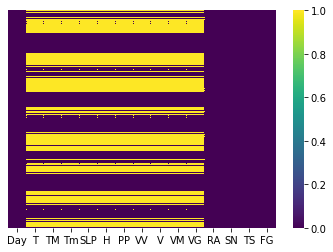

After removal of all the rows that contain null values


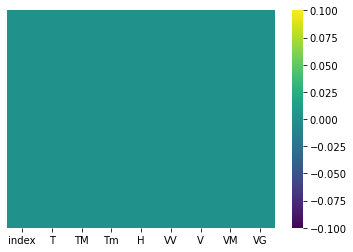

In [4]:
data = pd.read_csv(f'data/real_data/all_data.csv')

# chack for null values
print(data.isnull())

# Heat map
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

# drop the rows if they contain single NaN value
data = data.dropna(how='any', axis=0)    

# drop the columns that do not contain any useful information
# 'Day', 'SLP', 'PP', 'RA', 'SN', 'TS', 'FG'
data = data.drop(columns=['Day', 'SLP', 'PP', 'RA', 'SN', 'TS', 'FG'])

# remove the rows if they have missed data    
for col in data.columns:
    data = data[~data[col].isin(['-'])]
data = data.reset_index()

print('After removal of all the rows that contain null values')
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

## Data Analysis

In [5]:
data = data.apply(pd.to_numeric)
data.describe()

,index,T,TM,Tm,H,VV,V,VM,VG
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,1318.952428,9.515064,13.447473,5.741229,76.815659,9.333994,14.262141,24.712884,40.093162
std,1090.350392,7.257100,8.311923,6.421736,15.658423,2.425543,6.126732,8.805099,13.287208
min,0.000000,-11.100000,-8.000000,-15.000000,31.000000,0.200000,2.200000,7.200000,10.700000
25%,491.000000,4.400000,7.100000,1.000000,66.000000,8.400000,9.600000,18.300000,31.700000
50%,982.000000,9.200000,13.000000,5.900000,80.000000,10.000000,13.500000,24.100000,39.600000
75%,1954.000000,15.100000,20.000000,10.700000,90.000000,10.900000,18.100000,29.400000,48.200000
max,4013.000000,28.600000,35.200000,22.400000,100.000000,21.200000,37.400000,61.100000,98.200000


In [6]:
corr_matrix = data[data.columns[1:]].corr()
print(corr_matrix)
print(f'\n\nCorrelation of the features with target feature (VV)\n\n {corr_matrix["VV"]}')

           T        TM        Tm         H        VV         V        VM  \
T   1.000000  0.983566  0.973219 -0.509695  0.468046 -0.193199 -0.089237   
TM  0.983566  1.000000  0.931363 -0.582202  0.481813 -0.230681 -0.119547   
Tm  0.973219  0.931363  1.000000 -0.386883  0.422451 -0.150023 -0.050632   
H  -0.509695 -0.582202 -0.386883  1.000000 -0.607394  0.111006  0.127684   
VV  0.468046  0.481813  0.422451 -0.607394  1.000000  0.075224  0.104604   
V  -0.193199 -0.230681 -0.150023  0.111006  0.075224  1.000000  0.877064   
VM -0.089237 -0.119547 -0.050632  0.127684  0.104604  0.877064  1.000000   
VG -0.055525 -0.081894 -0.021274  0.119688  0.137321  0.767282  0.891840   

          VG  
T  -0.055525  
TM -0.081894  
Tm -0.021274  
H   0.119688  
VV  0.137321  
V   0.767282  
VM  0.891840  
VG  1.000000  


Correlation of the features with target feature (VV)

 T     0.468046
TM    0.481813
Tm    0.422451
H    -0.607394
VV    1.000000
V     0.075224
VM    0.104604
VG    0.137321
Nam

In [7]:
# skewness in the features of the data
skew = data[data.columns[1:]].skew()
print(skew)

T     0.027689
TM    0.146123
Tm   -0.132460
H    -0.670027
VV   -1.127101
V     0.641663
VM    0.624328
VG    0.622528
dtype: float64


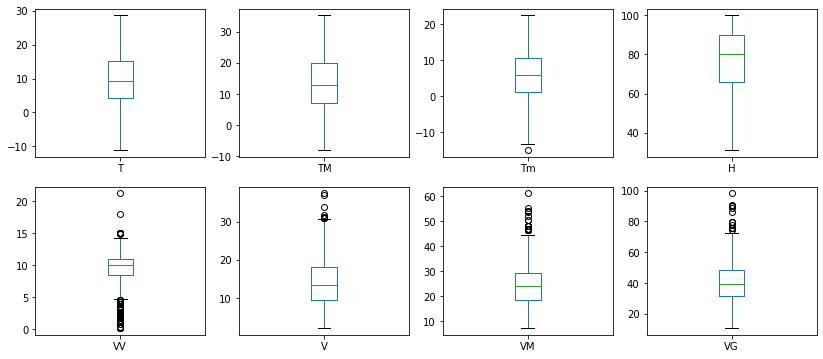

In [8]:
data[data.columns[1:]].plot(kind='box', subplots=True, layout=(2,4), figsize=(14, 6))
plt.show()

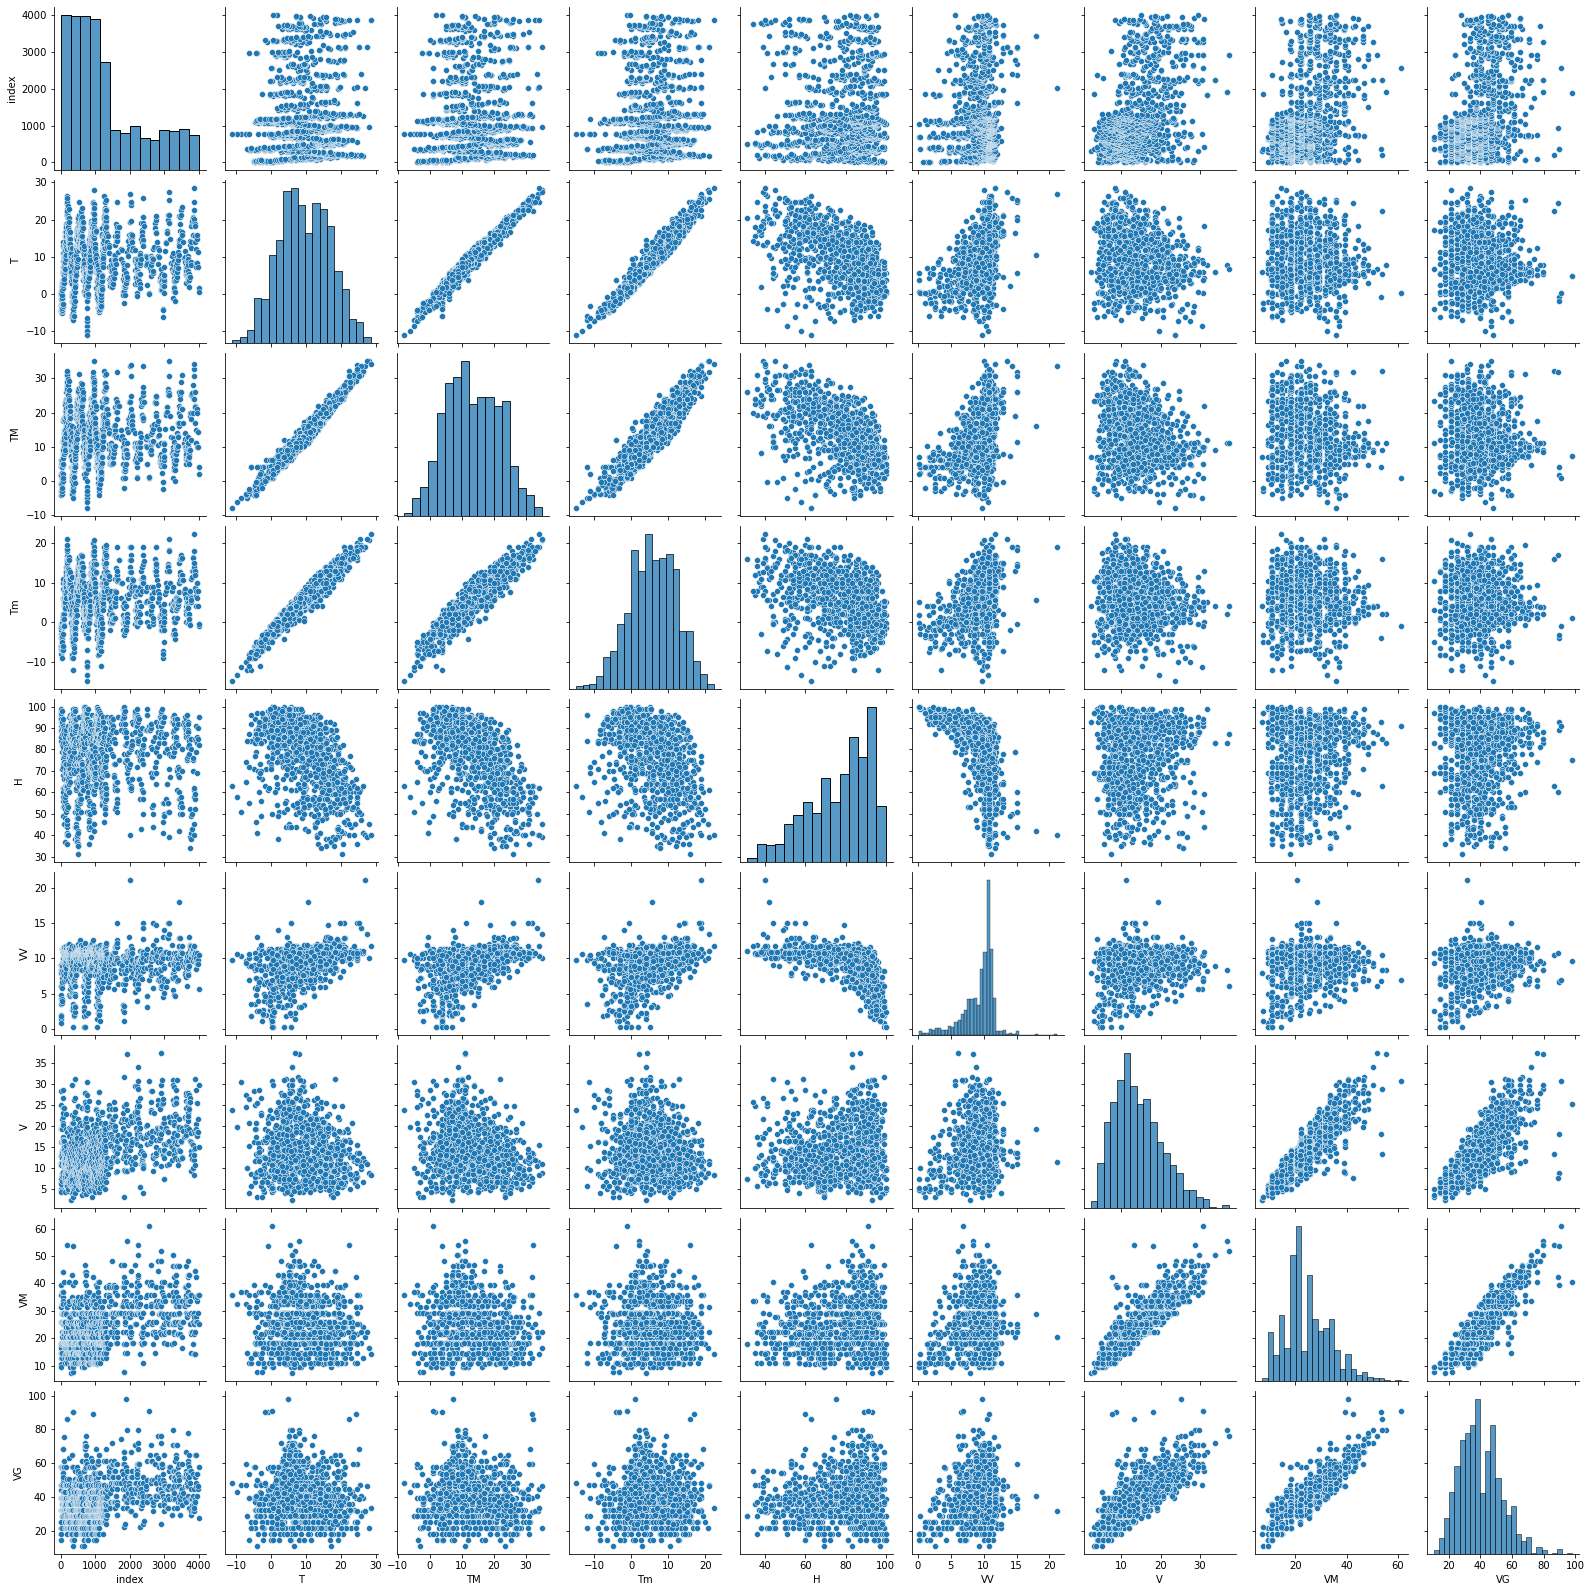

In [9]:
sns.pairplot(data)
plt.show()

## Train and test data selection

In [10]:
# Independent features
X = data.loc[:, ['T', 'TM', 'Tm', 'H', 'V', 'VM', 'VG']]

# Dependent feature (average visibility (km))
y = pd.to_numeric(data['VV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

# Model Training 

## Model Training on as-received data

In [11]:
# define the number of folds for the cross-validation
n_folds = 10
seed = 42
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

# define all the models
models = [('lr', LinearRegression()),
          ('ridge', Ridge()),
          ('lasso', Lasso()),
          ('en', ElasticNet()),
          ('dtree', DecisionTreeRegressor()),
          ('knr', KNeighborsRegressor()),
          ('rfr', RandomForestRegressor()),
          ('gbr', GradientBoostingRegressor()),
          ('xgb', xgb.XGBRegressor())]

# train all the models
score = 'neg_mean_squared_error'
cv_score, names = ([], [])
for name, model in models:
    names.append(name)
    cv_score.append(cross_val_score(model, X_train, y_train, scoring=score, cv=kfold))
    model = model.fit(X_train, y_train)
    
print(f'model\t|cv_score_mean\t\t|cv_score_std')
for i, name in enumerate(names):
    print(f'{name}\t|{np.mean(cv_score[i])}\t|{np.std(cv_score[i])}')


model	|cv_score_mean		|cv_score_std
lr	|-3.283888888038728	|0.5660829524952293
ridge	|-3.2838163487920378	|0.5661277682911746
lasso	|-3.3223865240417654	|0.650658229621652
en	|-3.3010646407981215	|0.6160565043738638
dtree	|-4.99527962962963	|1.0965357341311182
knr	|-2.7205968703703705	|0.4877958034722988
rfr	|-2.5286097016358022	|0.6674214300859205
gbr	|-2.456123513884412	|0.6485775031789106
xgb	|-2.9367761197292173	|0.7335585241079611


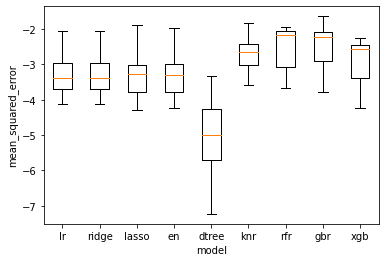

In [12]:
# mean standard error
fig,ax = plt.subplots()
ax.boxplot(cv_score)
ax.set(xlabel='model', ylabel='mean_squared_error', xticklabels=names)
plt.show()

From the mean squared error values for the cross validation data from different models:
    - Linear regression models are providing better scores compared to decision tree model
    - Ensemble models are providing better scores
        - Random forest and gradient boosting models are providing best scores

## Model training on standardised data

In [13]:
# define the number of folds for the cross-validation
n_folds = 10
seed = 42
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

# define all the models
models = [('s_lr', LinearRegression()),
          ('s_ridge', Ridge()),
          ('s_lasso', Lasso()),
          ('s_en', ElasticNet()),
          ('s_dtree', DecisionTreeRegressor()),
          ('s_knr', KNeighborsRegressor()),
          ('s_rfr', RandomForestRegressor()),
          ('s_gbr', GradientBoostingRegressor()),
          ('xgb', xgb.XGBRegressor())]

# standardisation
ssc = ('scaler', StandardScaler())

# train all the models
score = 'neg_mean_squared_error'
cv_score, names = ([], [])
for name, model in models:
    names.append(name)
    cv_score.append(cross_val_score(Pipeline([ssc,(name,model)]), X_train, y_train, 
                                    scoring=score, cv=kfold))
    model = model.fit(X_train, y_train)
      
print('Scores for the standardised data')
print(f'model\t\t|cv_score_mean\t\t\t|cv_score_std')
for i, name in enumerate(names):
    print(f'{name}\t\t|{np.mean(cv_score[i])}\t\t|{np.std(cv_score[i])}')

Scores for the standardised data
model		|cv_score_mean			|cv_score_std
s_lr		|-3.283888888038727		|0.5660829524952292
s_ridge		|-3.2809967441066377		|0.5687721402912514
s_lasso		|-4.713992080598759		|1.1351665308446837
s_en		|-4.1877814605684245		|1.0084265521226958
s_dtree		|-4.643076543209877		|0.8613785078005228
s_knr		|-3.009230364197531		|0.3846407362830751
s_rfr		|-2.5275473233179016		|0.6643930556774543
s_gbr		|-2.4500857700860963		|0.6499874713185606
xgb		|-2.938180057423133		|0.7345643972466855


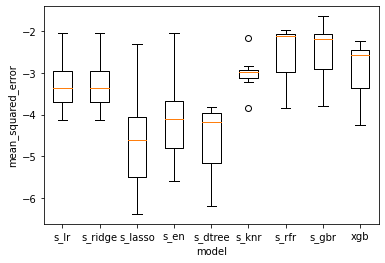

In [14]:
# mean standard error
fig,ax = plt.subplots()
ax.boxplot(cv_score)
ax.set(xlabel='model', ylabel='mean_squared_error', xticklabels=names)
plt.show()

The cross-validation scores from the standardised data did not imporve the scores significantly. Still, Random forest and gradient boosting models provide best score. Therefore, gradient boosting regressor is choosen as a final model for this problem.

## Hyper parameter tuning - Gradient Boosting Regressor

In [15]:
# define the number of folds for the cross-validation
n_folds = 5
seed = 42
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

# prepare data
pipeline = Pipeline([('sc', StandardScaler()), 
                     ('gbr', GradientBoostingRegressor())])

# values for hyper parameters tuning
params = {'gbr__n_estimators':[100, 150, 200, 250, 300, 500],
          'gbr__max_depth':[1,2,4,6]}

score = 'neg_mean_squared_error'
grid = GridSearchCV(pipeline, param_grid=params, 
                    scoring=score, cv=kfold, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train, y_train)

print(f'Grid search CV best params: {grid_result.best_params_}')
print(f'\nGrid search CV best score: {grid_result.best_score_}')
print(f'\nGrid search CV best estimator: {grid_result.best_estimator_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s


Grid search CV best params: {'gbr__max_depth': 2, 'gbr__n_estimators': 100}

Grid search CV best score: -2.3671793029667922

Grid search CV best estimator: Pipeline(steps=[('sc', StandardScaler()),
                ('gbr', GradientBoostingRegressor(max_depth=2))])


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.1s finished


## Final Model

From the grid search optimisation model, the following parameters are used for the final model:
    - n_estimators: 100
    - max_dept: 2
    - model: GradientBoostingRegressor

In [16]:
# data preparation
ssc = StandardScaler().fit(X_train)
X_train_sc = ssc.transform(X_train)
X_test_sc = ssc.transform(X_test)

# model
gbr = GradientBoostingRegressor(random_state=seed, max_depth=2, n_estimators=100)
gbr.fit(X_train_sc, y_train)

# error estimation
y_predict = gbr.predict(X_test_sc)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'mse of the model  : {mse}')
print(f'rmse of the model : {rmse}')

mse of the model  : 1.8588006294120039
rmse of the model : 1.3633783882004304


# Summery

In this work, we have implemented an optimised regression model is implemented to predict atmospheric visibility for a given set of whether data. The implementation includes:<br>
- webscrapping of the data<br>
- understaing of the data using the correlation between features<br>
- training of serveral models on as-received data and standardised data<br>
   - Linear regression models looked good<br>
   - Ensemble models provided best scores<br>
- fine tuning of the best model, gradient boosting regressor<br>